In [1]:
#import
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# List to save the AM
graphs = []

# We explore the graphs
for i in range(0, 100):
    # We convert the .csv to a matrix
    filename = f"./Adjacency_Matrices/network_{i}.csv"
    data = pd.read_csv(filename, header=None)
    matrix = data.values
    
    # Create the graph and adds it to the list
    G = nx.from_numpy_array(matrix)
    graphs.append(G)

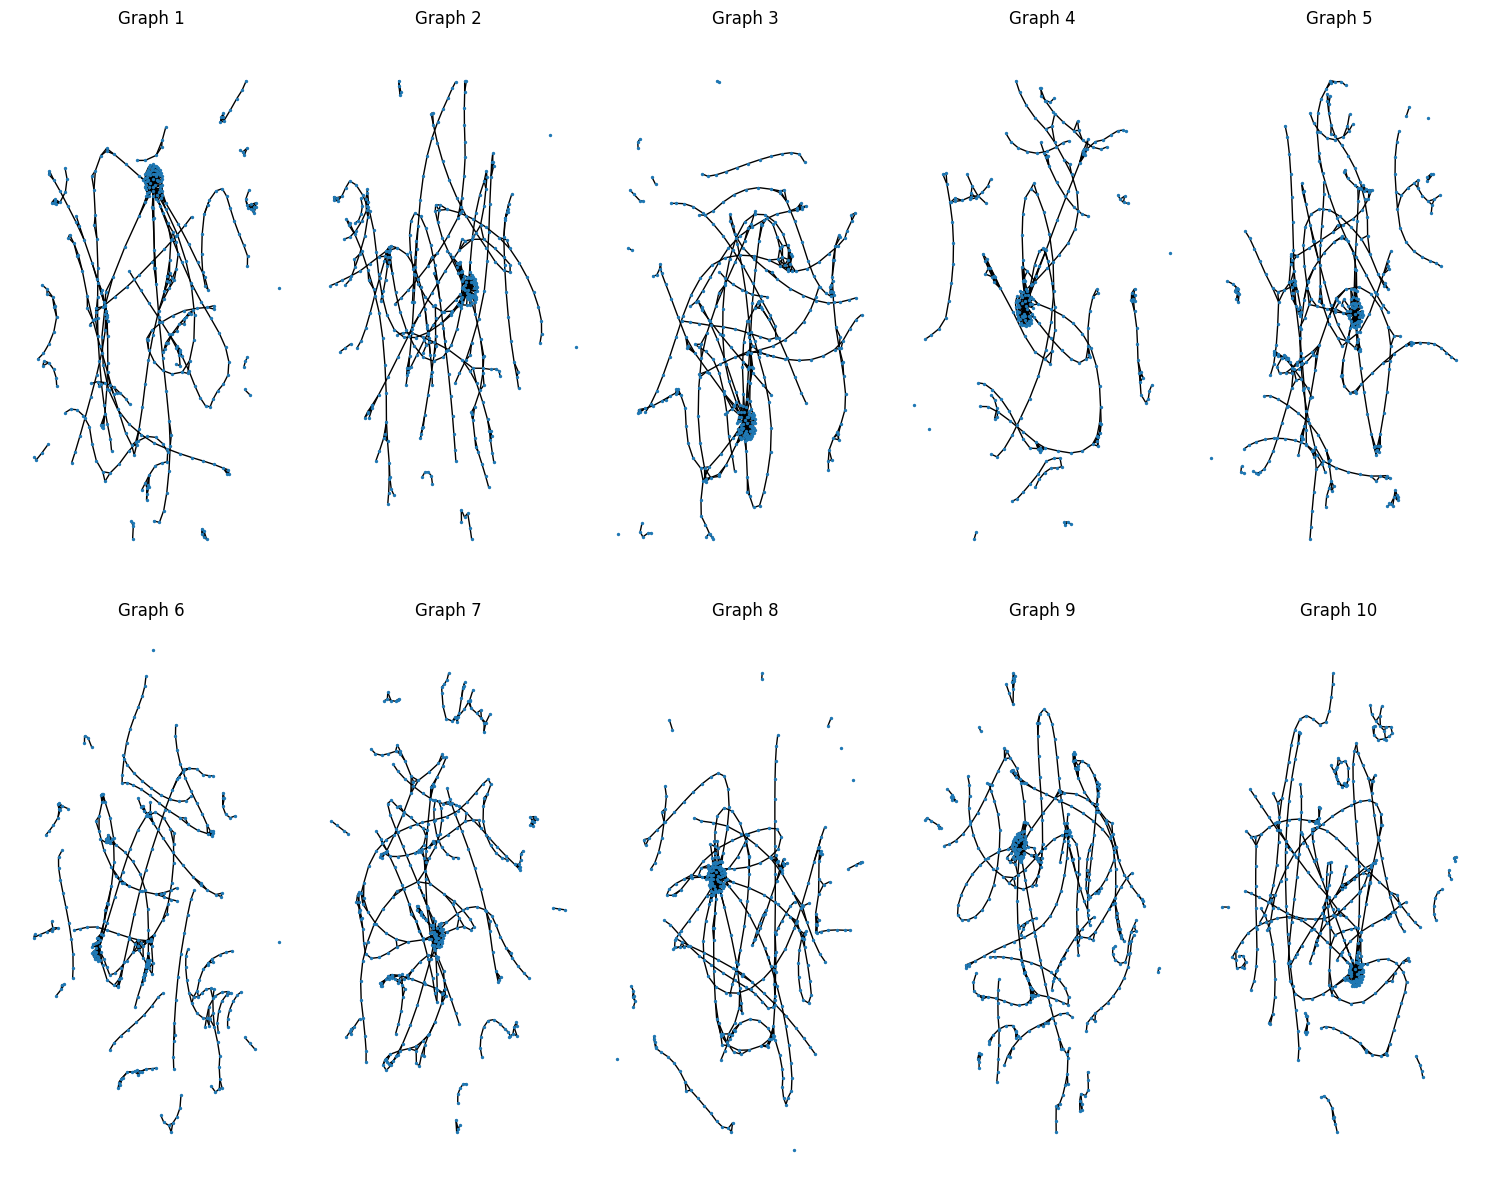

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(15, 12))

for i, G in enumerate(graphs):
    row = i // 5
    col = i % 5
    
    # We plot the graph
    nx.draw(G, ax=axs[row][col], node_size = 2)
    axs[row][col].set_title(f"Graph {i+1}")


plt.tight_layout()

# Show the figure
plt.show()
    

In [3]:
# List to save the values
noNetwork = []
averageDegree = []
averageBetweenness = []
averagePageRank= []
averageClustering = []

# We calculate the metrics
for i, G in tqdm(enumerate(graphs)):
    # Degree Centrality
    degreeCentrality = nx.degree_centrality(G)
    #degree = dict(G.degree())
    averageDegree_ = sum(degreeCentrality.values())/len(degreeCentrality)
    averageDegree.append(averageDegree_ )
    
    # Betweenness centrality
    betweennessCentrality = nx.betweenness_centrality(G)
    averageBetweenness_ = sum(betweennessCentrality.values())/len(betweennessCentrality)
    averageBetweenness.append(averageBetweenness_)
    
    # PageRank
    pageRank = nx.pagerank(G)
    averagePageRank_ = sum(pageRank.values())/len(pageRank)
    averagePageRank.append(averagePageRank_)
    
    # Coeficiente de clustering
    clusteringCoeff = nx.clustering(G)
    averageClustering_ = sum(clusteringCoeff.values())/len(clusteringCoeff)
    averageClustering.append(averageClustering_)
    
    
    noNetwork.append(i+1)

# Create the dataframe
df = pd.DataFrame({'No. Net': noNetwork,
                   'Average Degree': averageDegree,
                   'Average Betweenness': averageBetweenness,
                   'Average PageRank': averagePageRank,
                   'Average Clustering': averageClustering})

# Dataframe
print(df)


100it [01:50,  1.11s/it]

    No. Net  Average Degree  Average Betweenness  Average PageRank  \
0         1        0.007205             0.012195          0.002375   
1         2        0.007208             0.015868          0.002278   
2         3        0.006580             0.017848          0.002294   
3         4        0.009626             0.016106          0.003215   
4         5        0.006714             0.021442          0.002165   
..      ...             ...                  ...               ...   
95       96        0.003742             0.020357          0.001010   
96       97        0.003644             0.017779          0.000947   
97       98        0.003623             0.019125          0.000935   
98       99        0.003716             0.015232          0.000878   
99      100        0.003671             0.017841          0.000992   

    Average Clustering  
0             0.402879  
1             0.330064  
2             0.315325  
3             0.355825  
4             0.382748  
..       

In [4]:
filename = "network_metrics/metrics.csv"
df.to_csv(filename, index=False)

In [5]:

for i, G in tqdm(enumerate(graphs)):
    # Calculate the metrics
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    page_rank = nx.pagerank(G)
    clustering_coeff = nx.clustering(G)
    
    # We get the 100 nodes with highest and lowest degree
    sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    top_degree = [x[0] for x in sorted_degree_centrality[:100]]
    bottom_degree = [x[0] for x in sorted_degree_centrality[-100:]]
    
    # We get the 100 nodes with highest and lowest Betweenness Crentrality
    sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    top_betweenness = [x[0] for x in sorted_betweenness_centrality[:100]]
    bottom_betweenness = [x[0] for x in sorted_betweenness_centrality[-100:]]
    
    # We get the 100 nodes with highest and lowest pageRank
    sorted_page_rank = sorted(page_rank.items(), key=lambda x: x[1], reverse=True)
    top_page_rank = [x[0] for x in sorted_page_rank[:100]]
    bottom_page_rank = [x[0] for x in sorted_page_rank[-100:]]
    
    # We get the 100 nodes with highest and lowest clustering
    sorted_clustering_coeff = sorted(clustering_coeff.items(), key=lambda x: x[1], reverse=True)
    top_clustering = [x[0] for x in sorted_clustering_coeff[:100]]
    bottom_clustering = [x[0] for x in sorted_clustering_coeff[-100:]]
    
    # Save the file
    df = pd.DataFrame({'Top Degree Centrality': top_degree,
                       'Top Betweenness Centrality': top_betweenness,
                       'Top Page Rank': top_page_rank,
                       'Top Clustering Coefficient': top_clustering,
                       'Bottom Degree Centrality': bottom_degree,
                       'Bottom Betweenness Centrality': bottom_betweenness,
                       'Bottom Page Rank': bottom_page_rank,
                       'Bottom Clustering Coefficient': bottom_clustering})
    
    filename = f"./network_metrics/network_{i}.csv"
    df.to_csv(filename, index=False)

100it [01:49,  1.10s/it]
